<a href="https://colab.research.google.com/github/sabamontazeri/projectmabani/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
Data=pd.read_csv('/content/LungCancer.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
! apt-get install git
! git config --global user.email "sabaabaszade3@gmail.com"
! git config --global user.name "sabamontazeri"
!git clone https://github.com/sabamontazeri/machine-learning-course.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
fatal: destination path 'machine-learning-course' already exists and is not an empty directory.


In [55]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,LabelEncoder
Dataset=Data.drop(['index','Patient Id'],axis=1)
encoder=LabelEncoder()
Dataset['Level']=encoder.fit_transform(Dataset['Level'])
Dataset.shape


(1000, 24)

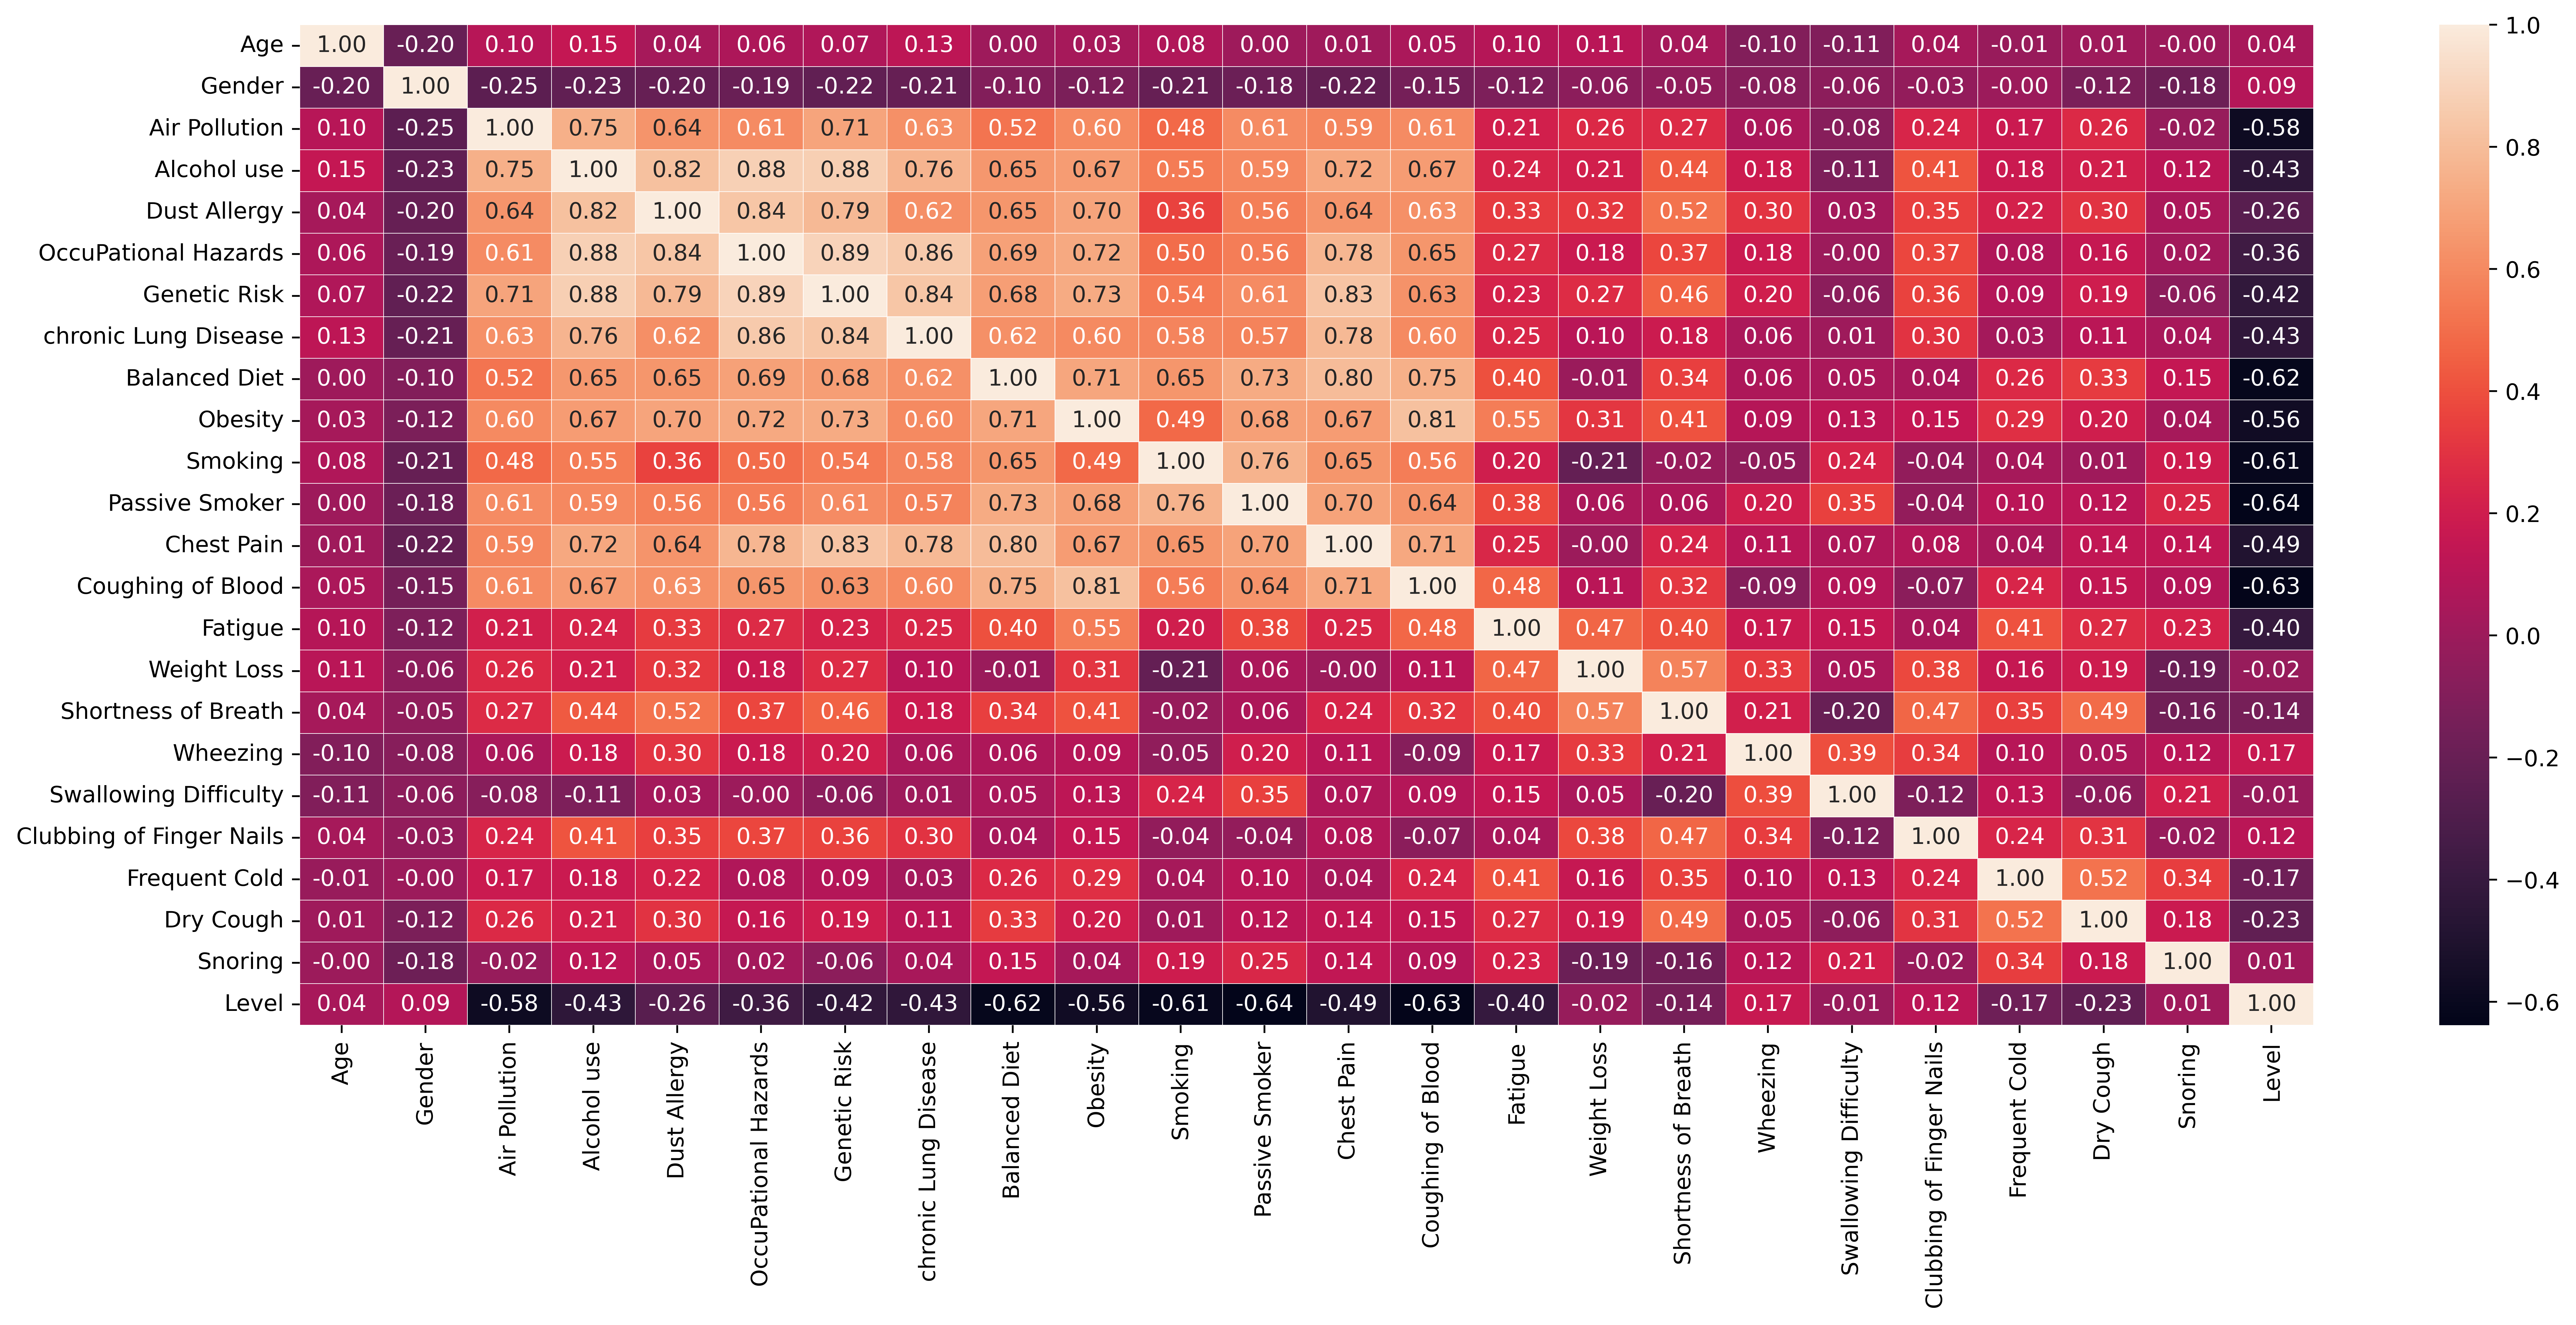

In [56]:
plt.figure(figsize=(20,8), dpi =500)
corr = Dataset.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.01)
plt.show()


In [57]:
Dataset=Dataset.drop(["Dust Allergy","Genetic Risk","chronic Lung Disease","Alcohol use"],axis=1)
Dataset.head()

,Age,Gender,Air Pollution,OccuPational Hazards,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,17,1,3,3,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,0
4,46,1,6,7,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,0


In [58]:
import numpy as np

from scipy import stats
import numpy as np
Zscores = Data.select_dtypes(include='number').apply(stats.zscore)
threshold_z = 2.7

outlier_indices = np.where(Zscores > threshold_z)[0]
outlier_indices=outlier_indices.tolist()
#print(type(outlier_indices))
Dataset=Dataset.drop(outlier_indices)
print(Dataset.shape)

(980, 20)


In [59]:
from sklearn.model_selection import train_test_split
X=Dataset.drop(['Level'],axis=1)
y=Dataset['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42,shuffle=True)

In [67]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=50)
params = {'max_depth': list(range(2, 6)), 'min_samples_split': [50,100,200]}
grid_search_cv = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), params, verbose=0, cv=5)
clf.fit(X_train ,y_train)
treepred_train=clf.predict(X_train)
treepred_test=clf.predict(X_test)

print("accuracy of train:%f" %accuracy_score(y_train,treepred_train))
print("accuracy of test:%f" %accuracy_score(y_test,treepred_test))
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, treepred_test,average="weighted")
print('Precision test: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, treepred_test,average="weighted")
print('Recall test: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, treepred_test,average="weighted")
print('F1 score test: %f' % f1)


accuracy of train:0.993622
accuracy of test:0.974490
Precision test: 0.976652
Recall test: 0.974490
F1 score test: 0.974648


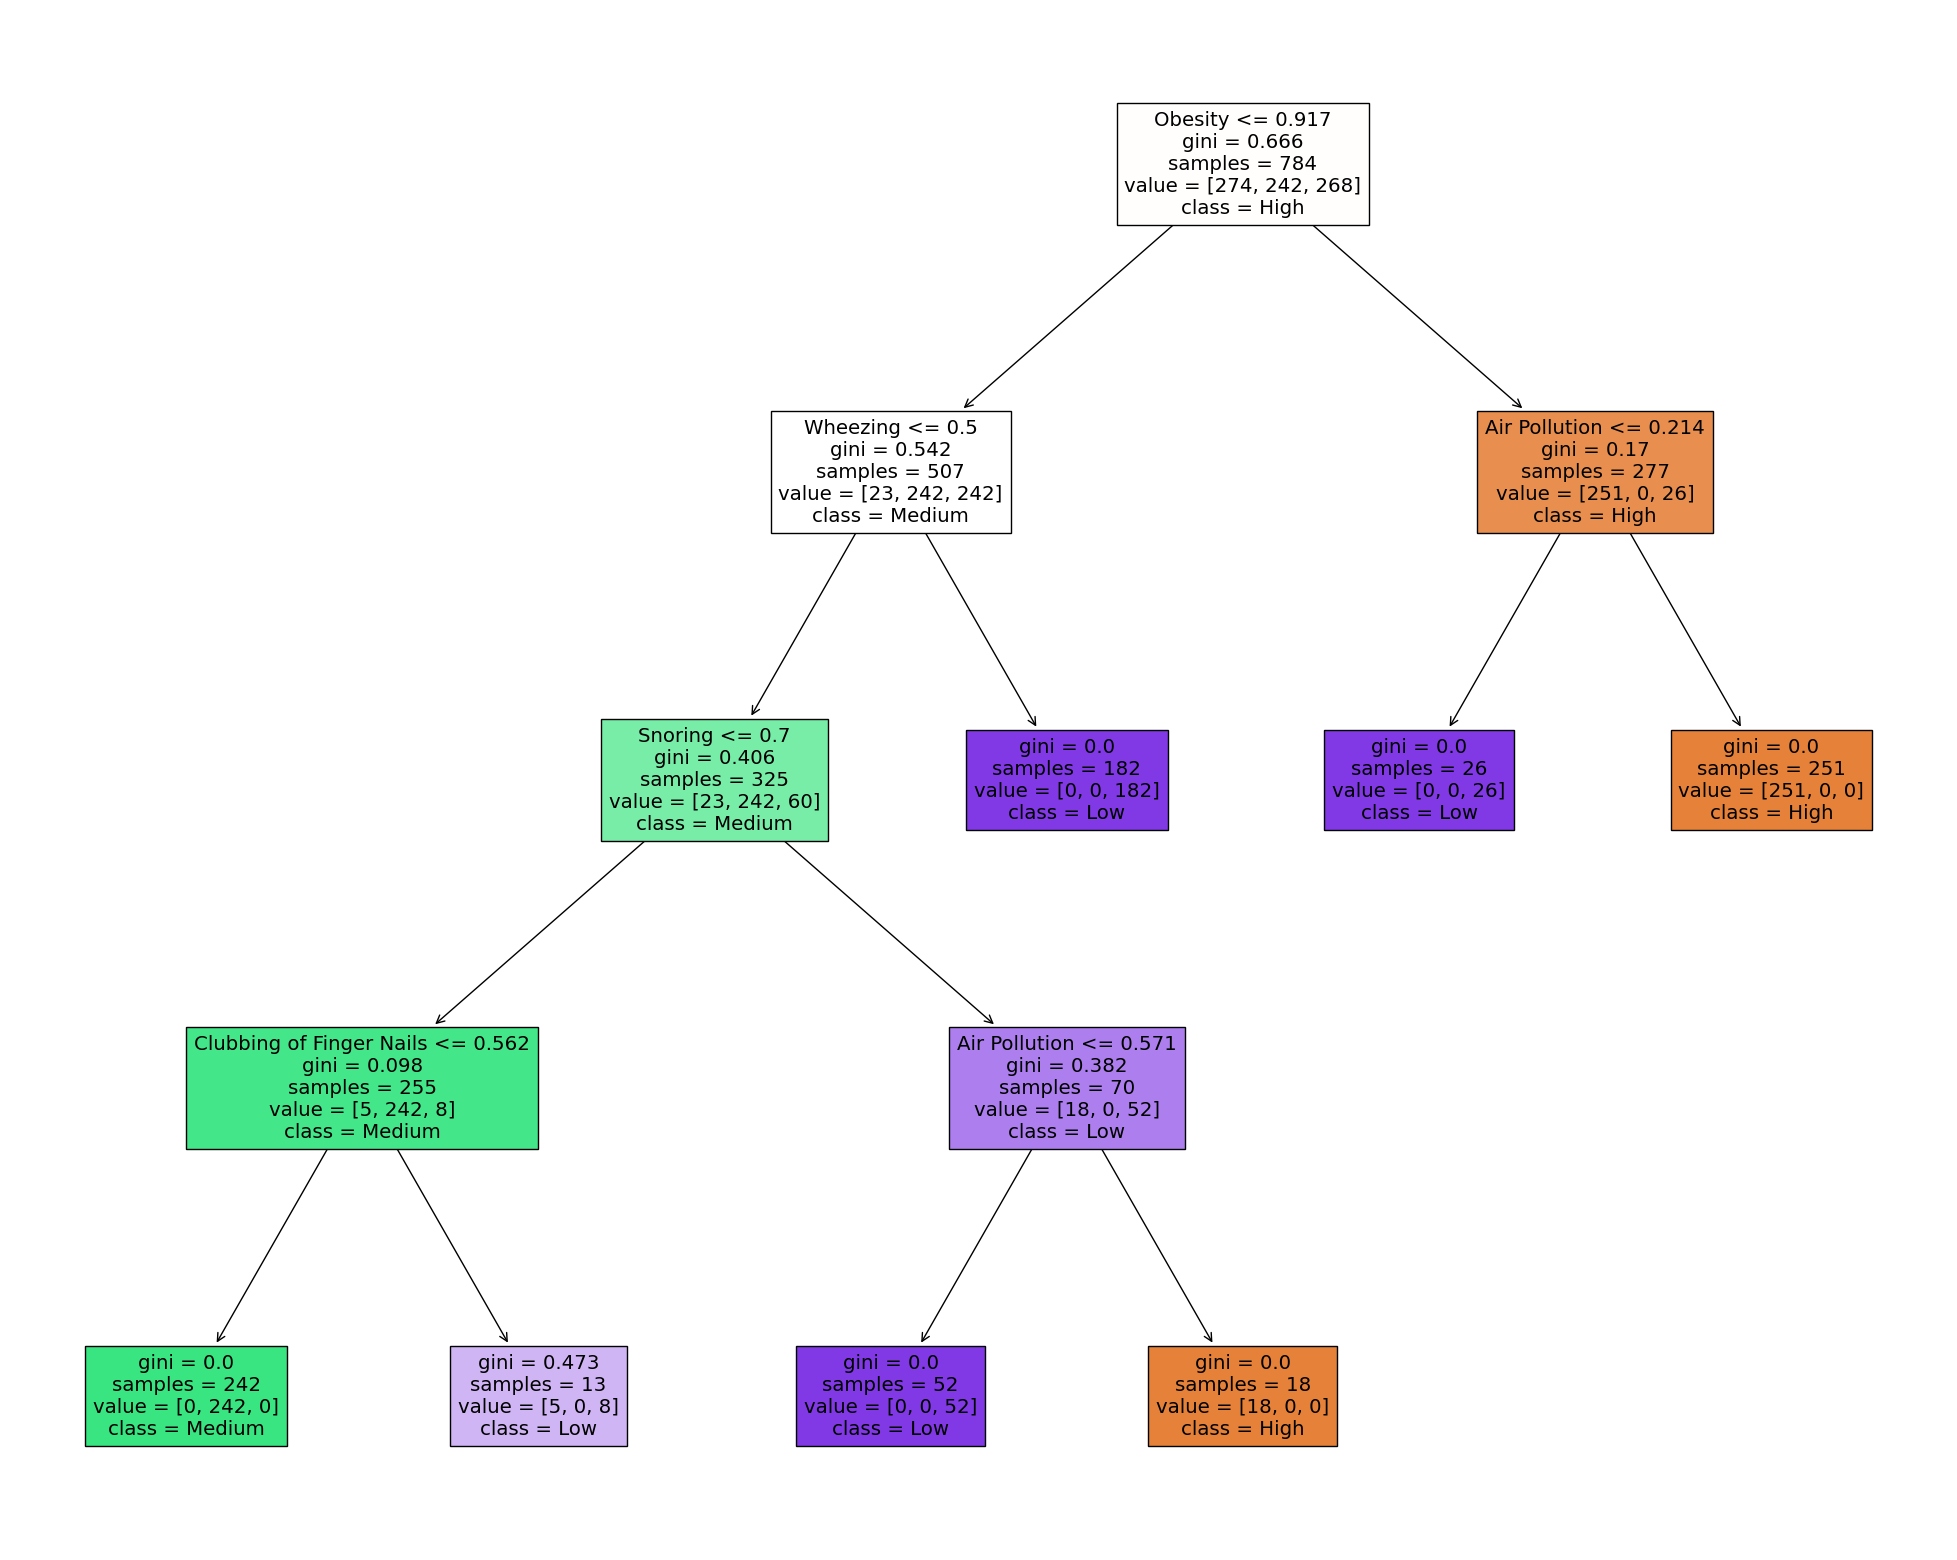

In [68]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=['High','Medium','Low'],
                   filled=True)

Cross Validation Scores:  0.9961685823754789
Precision: 0.976652
Recall: 0.974490
F1 score: 0.974648


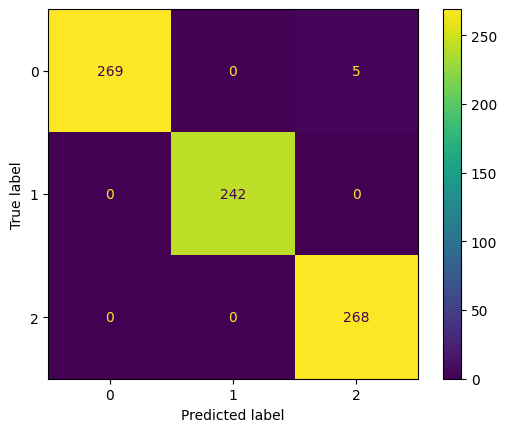

In [30]:
scores = cross_val_score(clf, X_train, y_train.ravel(), cv =3,scoring="accuracy")
print("Cross Validation Scores: ", scores.mean())


confusion_matrix = metrics.confusion_matrix(y_train.ravel(), treepred_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, )

cm_display.plot()
plt.show()